<a href="https://colab.research.google.com/github/sindhujajakkula/Gauss_points/blob/main/mlsample_xgboost.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd
pd.set_option("display.max_columns", 120)
pd.set_option("display.max_rows", 120)
from sklearn.model_selection import train_test_split

In [2]:
dataset = pd.read_csv('/content/Sample_data (1).csv')

In [3]:
dataset

,E,nu,B_x,C_x,C_y,D_x,D_y,Gauss Points
0,8.000000e+10,0.325,1.286834,0.491369,1.588519,-0.452813,1.472879,3
1,2.000000e+11,0.250,0.893351,0.721683,0.924287,-0.244848,1.044743,3
2,8.000000e+10,0.275,1.782956,1.409239,1.228062,-0.527555,1.502008,3
3,1.600000e+11,0.200,0.939067,1.006932,0.967393,-0.041010,0.984627,3
4,8.000000e+10,0.275,1.035314,0.581292,0.991668,-0.313221,0.644734,3
...,...,...,...,...,...,...,...,...
99995,1.800000e+11,0.325,1.350164,1.576151,1.495129,-0.228413,1.223775,3
99996,1.200000e+11,0.250,0.992425,0.798062,1.295789,-0.065018,0.897140,3
99997,1.800000e+11,0.300,0.964931,1.085251,0.929633,0.079629,0.988081,3
99998,1.000000e+11,0.250,1.030711,1.254512,1.043643,0.061652,0.684041,3


In [4]:
dataset.shape

(100000, 8)

In [5]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100000 entries, 0 to 99999
Data columns (total 8 columns):
 #   Column        Non-Null Count   Dtype  
---  ------        --------------   -----  
 0   E             100000 non-null  float64
 1   nu            100000 non-null  float64
 2   B_x           100000 non-null  float64
 3   C_x           100000 non-null  float64
 4   C_y           100000 non-null  float64
 5   D_x           100000 non-null  float64
 6   D_y           100000 non-null  float64
 7   Gauss Points  100000 non-null  int64  
dtypes: float64(7), int64(1)
memory usage: 6.1 MB


In [6]:
dataset.columns

Index(['E', 'nu', 'B_x', 'C_x', 'C_y', 'D_x', 'D_y', 'Gauss Points'], dtype='object')

In [7]:
input_columns = dataset.columns[:-1].tolist()

In [8]:
input_columns

['E', 'nu', 'B_x', 'C_x', 'C_y', 'D_x', 'D_y']

In [9]:
target_column = dataset.columns[-1]

In [10]:
target_column

'Gauss Points'

In [11]:
inputs = dataset[input_columns].copy()
targets = dataset[target_column].copy()

In [12]:
type(inputs)

pandas.core.frame.DataFrame

In [13]:
inputs

,E,nu,B_x,C_x,C_y,D_x,D_y
0,8.000000e+10,0.325,1.286834,0.491369,1.588519,-0.452813,1.472879
1,2.000000e+11,0.250,0.893351,0.721683,0.924287,-0.244848,1.044743
2,8.000000e+10,0.275,1.782956,1.409239,1.228062,-0.527555,1.502008
3,1.600000e+11,0.200,0.939067,1.006932,0.967393,-0.041010,0.984627
4,8.000000e+10,0.275,1.035314,0.581292,0.991668,-0.313221,0.644734
...,...,...,...,...,...,...,...
99995,1.800000e+11,0.325,1.350164,1.576151,1.495129,-0.228413,1.223775
99996,1.200000e+11,0.250,0.992425,0.798062,1.295789,-0.065018,0.897140
99997,1.800000e+11,0.300,0.964931,1.085251,0.929633,0.079629,0.988081
99998,1.000000e+11,0.250,1.030711,1.254512,1.043643,0.061652,0.684041


In [14]:
targets

0        3
1        3
2        3
3        3
4        3
        ..
99995    3
99996    3
99997    3
99998    3
99999    3
Name: Gauss Points, Length: 100000, dtype: int64

In [15]:
inputs.isna().sum()

E      0
nu     0
B_x    0
C_x    0
C_y    0
D_x    0
D_y    0
dtype: int64

#Scale Numeric Values
Let's scale numeric values to the 0 to 1 range.

In [17]:
from sklearn.preprocessing import MinMaxScaler

In [18]:
scaler = MinMaxScaler().fit(inputs)

In [20]:
inputs

,E,nu,B_x,C_x,C_y,D_x,D_y
0,8.000000e+10,0.325,1.286834,0.491369,1.588519,-0.452813,1.472879
1,2.000000e+11,0.250,0.893351,0.721683,0.924287,-0.244848,1.044743
2,8.000000e+10,0.275,1.782956,1.409239,1.228062,-0.527555,1.502008
3,1.600000e+11,0.200,0.939067,1.006932,0.967393,-0.041010,0.984627
4,8.000000e+10,0.275,1.035314,0.581292,0.991668,-0.313221,0.644734
...,...,...,...,...,...,...,...
99995,1.800000e+11,0.325,1.350164,1.576151,1.495129,-0.228413,1.223775
99996,1.200000e+11,0.250,0.992425,0.798062,1.295789,-0.065018,0.897140
99997,1.800000e+11,0.300,0.964931,1.085251,0.929633,0.079629,0.988081
99998,1.000000e+11,0.250,1.030711,1.254512,1.043643,0.061652,0.684041


#Gradient Boosting

##Training


In [21]:
from xgboost import XGBRegressor

In [22]:
model = XGBRegressor(random_state=42, n_jobs=-1, n_estimators=20, max_depth=4)

In [23]:
%%time
model.fit(inputs, targets)

[12:27:22] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
CPU times: user 2.2 s, sys: 17.9 ms, total: 2.22 s
Wall time: 1.17 s


XGBRegressor(max_depth=4, n_estimators=20, n_jobs=-1, random_state=42)

#Prediction

In [25]:
preds = model.predict(inputs)

In [26]:
preds

array([2.7895463, 2.6902504, 2.8007572, ..., 2.6543963, 2.9197202,
       2.791186 ], dtype=float32)

#Evaluation

In [27]:
from sklearn.metrics import mean_squared_error

def rmse(a, b):
    return mean_squared_error(a, b, squared=False)

In [28]:
rmse(preds, targets)

0.49029947829656884

#Visualization

In [30]:
import matplotlib.pyplot as plt
from xgboost import plot_tree
from matplotlib.pylab import rcParams
%matplotlib inline

rcParams['figure.figsize'] = 30,30

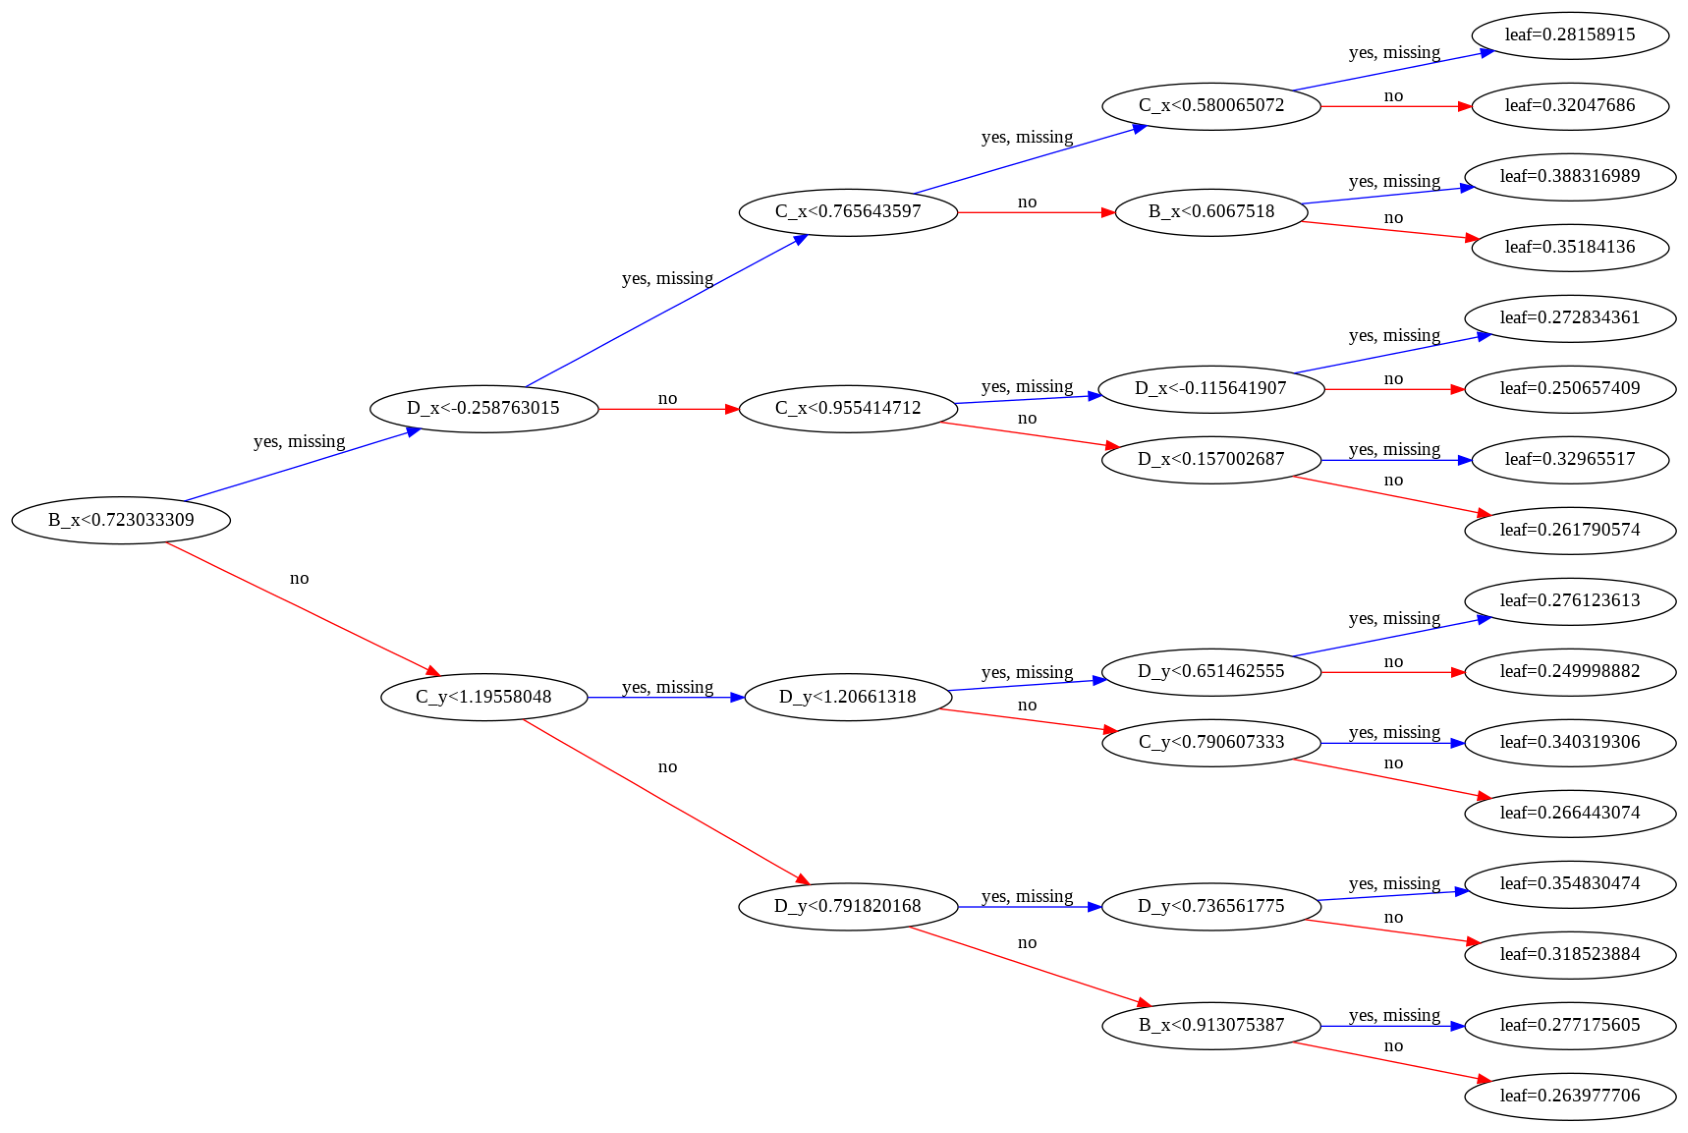

In [31]:
plot_tree(model, rankdir='LR')

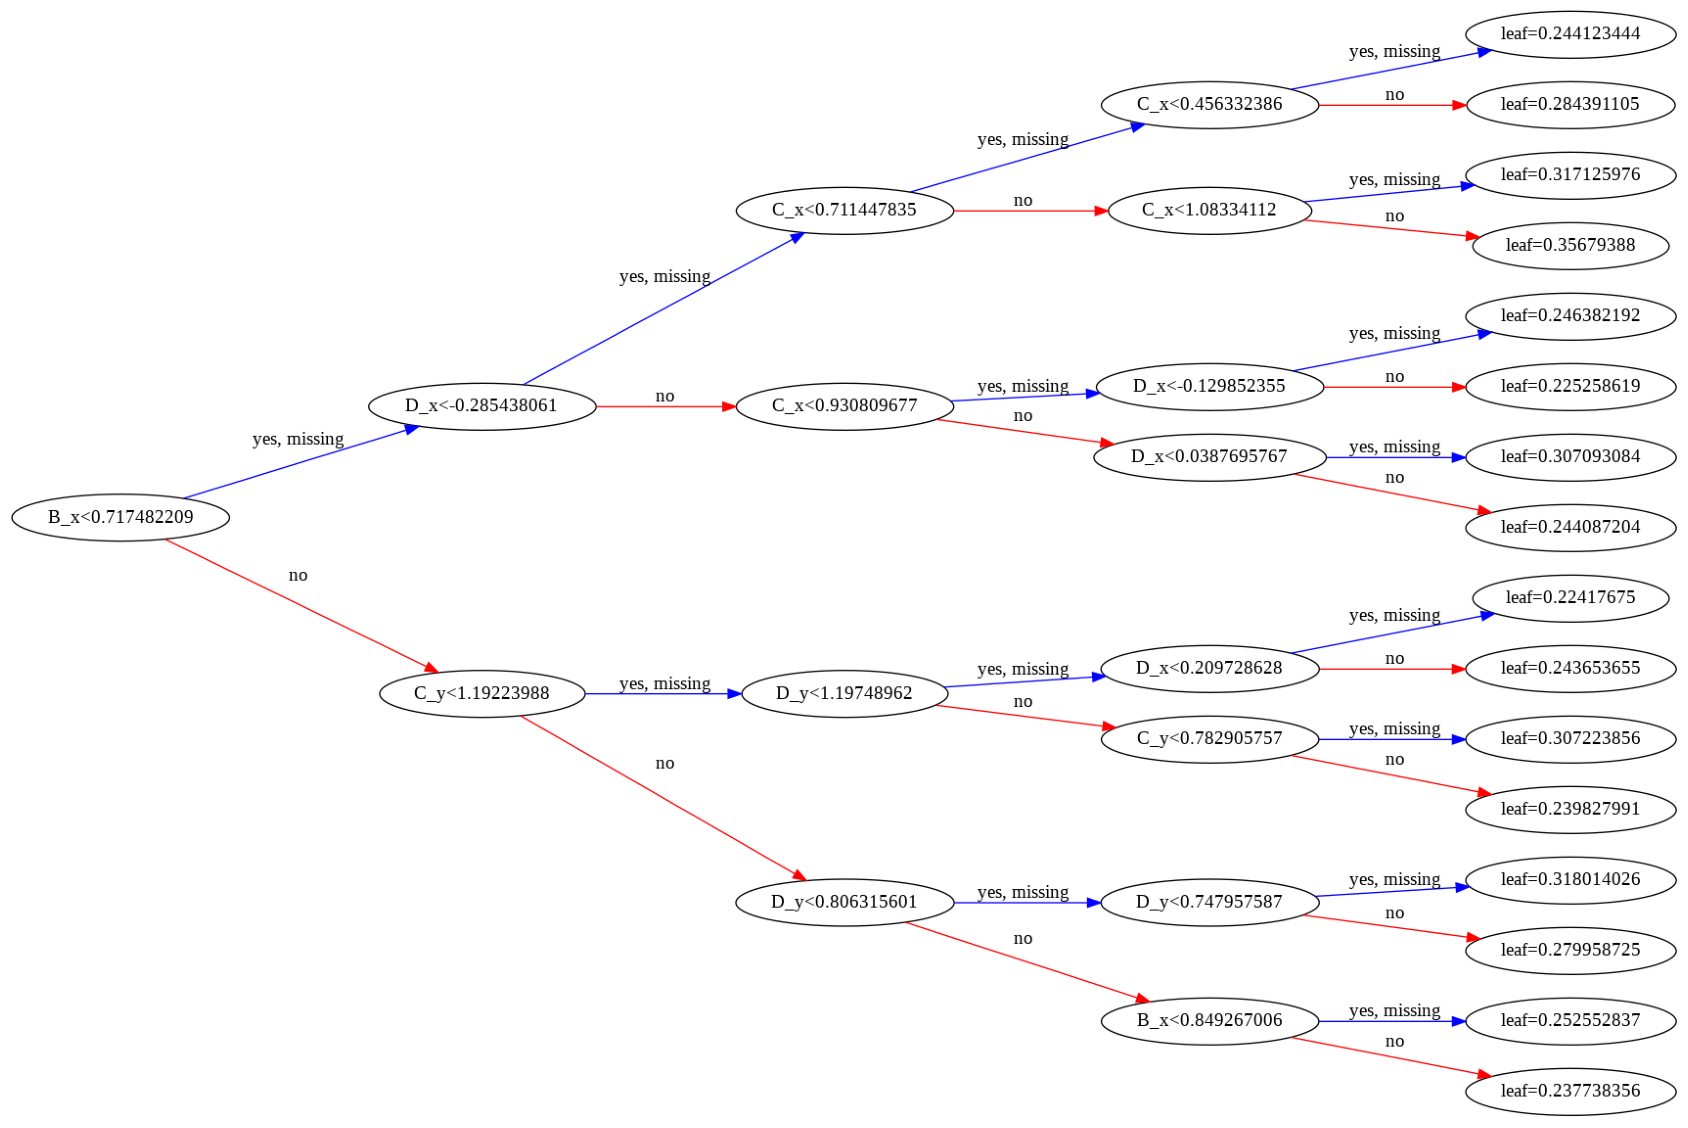

In [32]:
plot_tree(model, rankdir='LR', num_trees=1)

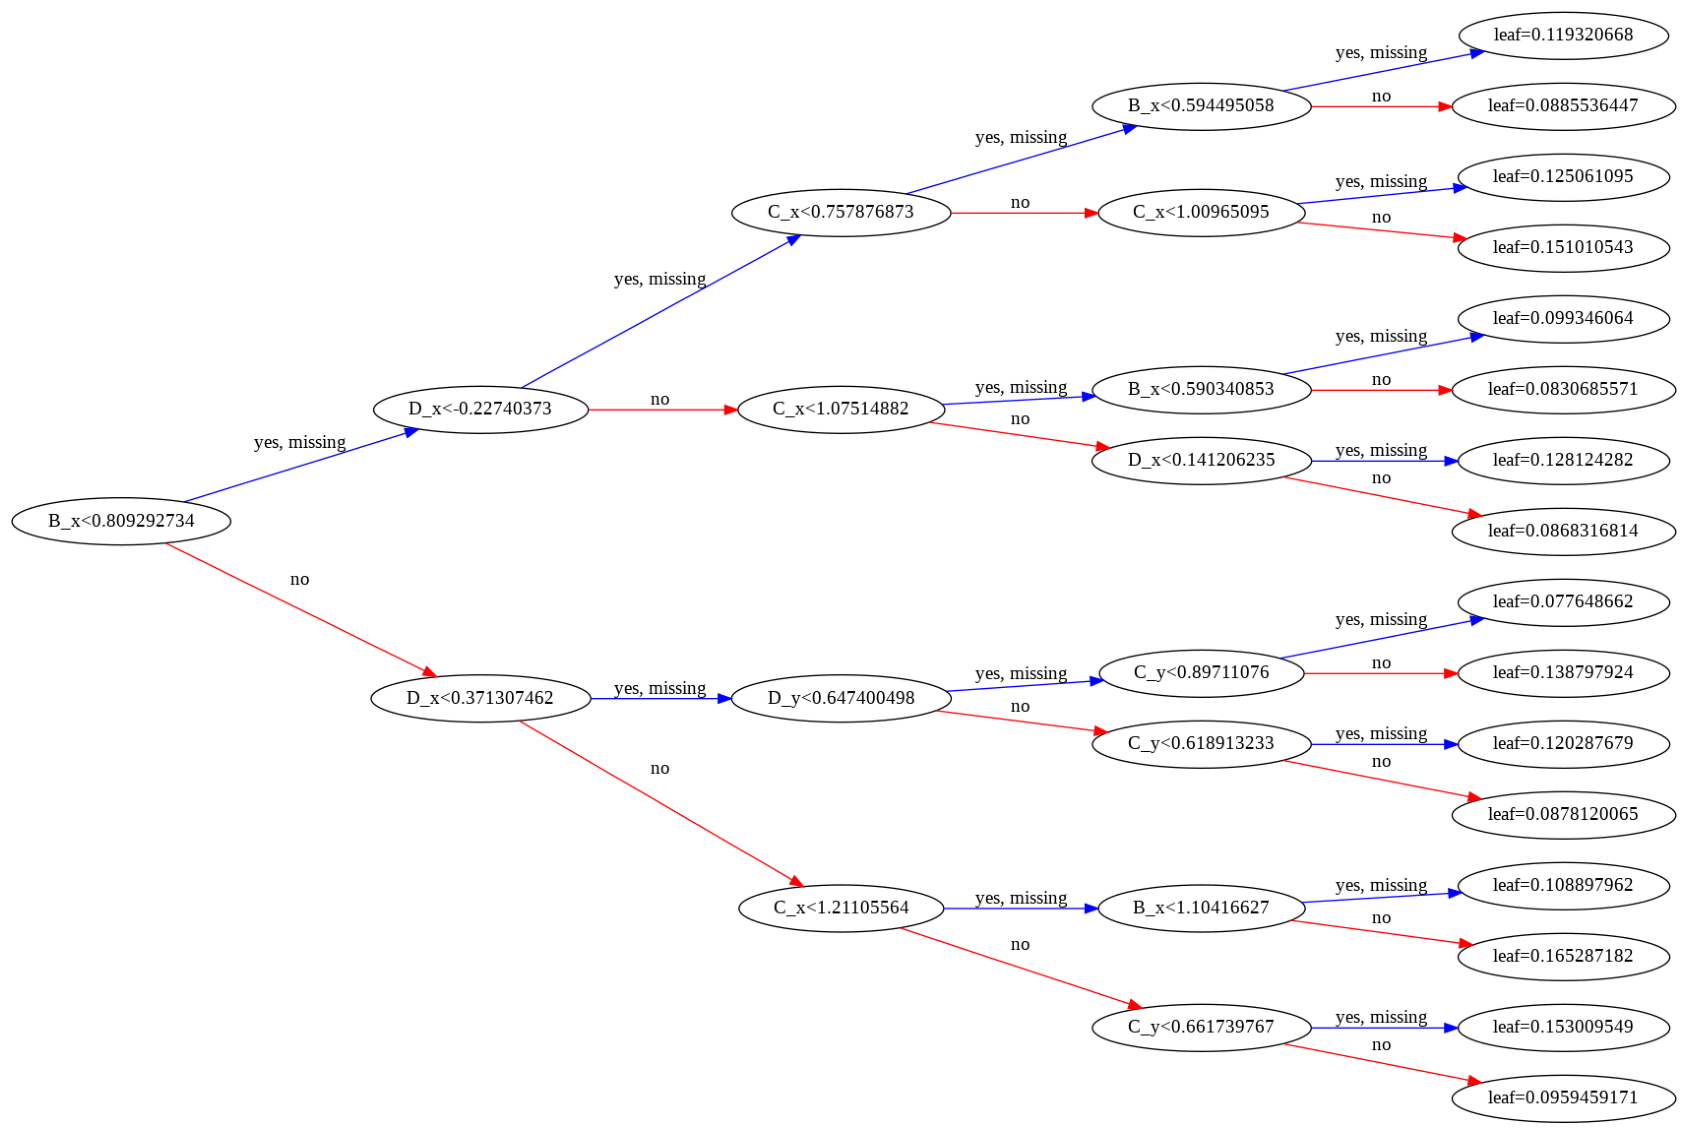

In [33]:
plot_tree(model, rankdir='LR', num_trees=10);

In [34]:
trees = model.get_booster().get_dump()

In [35]:
len(trees)

20

In [36]:
print(trees[0])

0:[B_x<0.723033309] yes=1,no=2,missing=1
	1:[D_x<-0.258763015] yes=3,no=4,missing=3
		3:[C_x<0.765643597] yes=7,no=8,missing=7
			7:[C_x<0.580065072] yes=15,no=16,missing=15
				15:leaf=0.28158915
				16:leaf=0.32047686
			8:[B_x<0.6067518] yes=17,no=18,missing=17
				17:leaf=0.388316989
				18:leaf=0.35184136
		4:[C_x<0.955414712] yes=9,no=10,missing=9
			9:[D_x<-0.115641907] yes=19,no=20,missing=19
				19:leaf=0.272834361
				20:leaf=0.250657409
			10:[D_x<0.157002687] yes=21,no=22,missing=21
				21:leaf=0.32965517
				22:leaf=0.261790574
	2:[C_y<1.19558048] yes=5,no=6,missing=5
		5:[D_y<1.20661318] yes=11,no=12,missing=11
			11:[D_y<0.651462555] yes=23,no=24,missing=23
				23:leaf=0.276123613
				24:leaf=0.249998882
			12:[C_y<0.790607333] yes=25,no=26,missing=25
				25:leaf=0.340319306
				26:leaf=0.266443074
		6:[D_y<0.791820168] yes=13,no=14,missing=13
			13:[D_y<0.736561775] yes=27,no=28,missing=27
				27:leaf=0.354830474
				28:leaf=0.318523884
			14:[B_x<0.913075387] yes=29,no

#Feature importance

In [38]:
inputs.columns

Index(['E', 'nu', 'B_x', 'C_x', 'C_y', 'D_x', 'D_y'], dtype='object')

In [39]:
importance_df = pd.DataFrame({
    'feature': inputs.columns,
    'importance': model.feature_importances_
}).sort_values('importance', ascending=False)

In [40]:
importance_df.head(10)

,feature,importance
6,D_y,0.283188
4,C_y,0.227853
2,B_x,0.192198
5,D_x,0.157750
3,C_x,0.139011
0,E,0.000000
1,nu,0.000000


#K Fold Cross Validation

In [41]:
from sklearn.model_selection import KFold

In [42]:
def train_and_evaluate(X_train, train_targets, X_val, val_targets, **params):
    model = XGBRegressor(random_state=42, n_jobs=-1, **params)
    model.fit(X_train, train_targets)
    train_rmse = rmse(model.predict(X_train), train_targets)
    val_rmse = rmse(model.predict(X_val), val_targets)
    return model, train_rmse, val_rmse

In [43]:
kfold = KFold(n_splits=5)

In [45]:
models = []

for train_idxs, val_idxs in kfold.split(inputs):
    X_train, train_targets = inputs.iloc[train_idxs], targets.iloc[train_idxs]
    X_val, val_targets = inputs.iloc[val_idxs], targets.iloc[val_idxs]
    model, train_rmse, val_rmse = train_and_evaluate(X_train, 
                                                     train_targets, 
                                                     X_val, 
                                                     val_targets, 
                                                     max_depth=4, 
                                                     n_estimators=20)
    models.append(model)
    print('Train RMSE: {}, Validation RMSE: {}'.format(train_rmse, val_rmse))

[12:32:05] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
Train RMSE: 0.4888289731498669, Validation RMSE: 0.4896682623017868
[12:32:06] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
Train RMSE: 0.49089587214545166, Validation RMSE: 0.49496292642479534
[12:32:07] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
Train RMSE: 0.4885342345289412, Validation RMSE: 0.4907567468417464
[12:32:08] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
Train RMSE: 0.49022486992596204, Validation RMSE: 0.492152615620484
[12:32:09] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
Train RMSE: 0.489827524602666, Validation RMSE: 0.4919919419152998


In [46]:
import numpy as np

def predict_avg(models, inputs):
    return np.mean([model.predict(inputs) for model in models], axis=0)

In [47]:
preds = predict_avg(models, inputs)

In [48]:
preds

array([2.769114 , 2.6920712, 2.7873523, ..., 2.6571891, 2.917736 ,
       2.796198 ], dtype=float32)

#Hyperparameter Tuning and Regularization

In [49]:
model

XGBRegressor(max_depth=4, n_estimators=20, n_jobs=-1, random_state=42)

In [50]:
from sklearn.model_selection import train_test_split

In [52]:
X_train, X_val, train_targets, val_targets = train_test_split(inputs, targets, test_size=0.2)

In [57]:
def test_params(**params):
    model = XGBRegressor(n_jobs=-1, random_state=42, **params)
    model.fit(X_train, train_targets)
    train_rmse = rmse(model.predict(X_train), train_targets)
    val_rmse = rmse(model.predict(X_val), val_targets)
    print('Train RMSE: {}, Validation RMSE: {}'.format(train_rmse, val_rmse))
    return train_rmse, val_rmse

n_estimators

In [85]:
Train_RMSE = []
Validation_RMSE = []
for i in range(10,101,10):
  train_rmse, val_rmse = test_params(n_estimators=i)
  Train_RMSE.append(train_rmse)
  Validation_RMSE.append(val_rmse)


[13:04:19] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
Train RMSE: 1.0177379432871336, Validation RMSE: 1.0180165367195726
[13:04:19] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
Train RMSE: 0.5105798534219661, Validation RMSE: 0.5119507265433518
[13:04:21] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
Train RMSE: 0.39248686607909133, Validation RMSE: 0.3949949518947138
[13:04:23] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
Train RMSE: 0.3653889177461678, Validation RMSE: 0.36860374163602666
[13:04:25] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
Train RMSE: 0.35645528677407134, Validation RMSE: 0.3601849642687593
[13:04:27] WARNING: /w

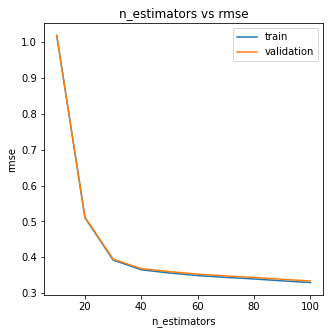

In [86]:
import matplotlib.pyplot as plt
i = range(10,101,10)
plt.figure(figsize=(5, 5))
plt.plot(i, Train_RMSE, label='train')
plt.plot(i, Validation_RMSE, label='validation')
plt.legend()
plt.title("n_estimators vs rmse")
plt.xlabel('n_estimators')
plt.ylabel('rmse')
plt.show()

max_depth

In [82]:
Train_RMSE_depth = []
Validation_RMSE_depth = []
for i in range(1, 10):
  train_rmse, val_rmse = test_params(max_depth=i)
  Train_RMSE_depth.append(train_rmse)
  Validation_RMSE_depth.append(val_rmse)

[13:00:54] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
Train RMSE: 0.4474257825567755, Validation RMSE: 0.4475517950789389
[13:00:57] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
Train RMSE: 0.37400515749691454, Validation RMSE: 0.37719524637155205
[13:01:00] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
Train RMSE: 0.3298248672234563, Validation RMSE: 0.3341851886931948
[13:01:04] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
Train RMSE: 0.29799192300966854, Validation RMSE: 0.3027181122132696
[13:01:09] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
Train RMSE: 0.27196610385733305, Validation RMSE: 0.2795707563067319
[13:01:15] WARNING: /

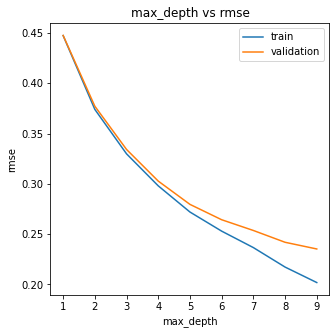

In [83]:
import matplotlib.pyplot as plt
i = range(1, 10)
plt.figure(figsize=(5, 5))
plt.plot(i, Train_RMSE_depth, label='train')
plt.plot(i, Validation_RMSE_depth, label='validation')
plt.legend()
plt.title("max_depth vs rmse")
plt.xlabel('max_depth')
plt.ylabel('rmse')
plt.show()

n_estimators with max_depth fixed

In [88]:
Train_RMSE_depthfixed = []
Validation_RMSE_depthfixed = []
for i in range(10,101,10):
  train_rmse, val_rmse = test_params(n_estimators=i, max_depth=5)
  Train_RMSE_depthfixed.append(train_rmse)
  Validation_RMSE_depthfixed.append(val_rmse)

[13:09:58] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
Train RMSE: 1.002019661804269, Validation RMSE: 1.0032983098913537
[13:10:00] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
Train RMSE: 0.4713494629129022, Validation RMSE: 0.47385221927719745
[13:10:03] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
Train RMSE: 0.3406154159405719, Validation RMSE: 0.3443424629646178
[13:10:07] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
Train RMSE: 0.3068233831997116, Validation RMSE: 0.31108797813587363
[13:10:12] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
Train RMSE: 0.29668993191294163, Validation RMSE: 0.301336082147139
[13:10:19] WARNING: /wor

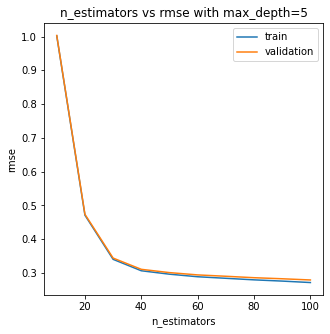

In [89]:
import matplotlib.pyplot as plt
i = range(10,101,10)
plt.figure(figsize=(5, 5))
plt.plot(i, Train_RMSE_depthfixed, label='train')
plt.plot(i, Validation_RMSE_depthfixed, label='validation')
plt.legend()
plt.title("n_estimators vs rmse with max_depth=5")
plt.xlabel('n_estimators')
plt.ylabel('rmse')
plt.show()

learning_rate

In [90]:
test_params(n_estimators=40, max_depth = 5, learning_rate=0.01)

[13:15:07] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
Train RMSE: 1.8260950221949122, Validation RMSE: 1.826623656962026


(1.8260950221949122, 1.826623656962026)

In [91]:
test_params(n_estimators=40, max_depth = 5, learning_rate=0.1)

[13:15:23] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
Train RMSE: 0.3068233831997116, Validation RMSE: 0.31108797813587363


(0.3068233831997116, 0.31108797813587363)

In [93]:
test_params(n_estimators=40, max_depth = 5, learning_rate=0.2)


[13:16:08] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
Train RMSE: 0.2775535547711767, Validation RMSE: 0.28437674269105223


(0.2775535547711767, 0.28437674269105223)

In [92]:
test_params(n_estimators=40, max_depth = 5, learning_rate=0.3)

[13:15:35] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
Train RMSE: 0.27054584080116967, Validation RMSE: 0.27947341958894584


(0.27054584080116967, 0.27947341958894584)

In [94]:
test_params(n_estimators=40, max_depth = 5, learning_rate=0.5)

[13:16:37] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
Train RMSE: 0.26140409434307854, Validation RMSE: 0.27354069063490377


(0.26140409434307854, 0.27354069063490377)

n_estimators = 40 and max_depth = 5, learning_rate = 0.3 give optimal training and validation error.

In [96]:
model = XGBRegressor(n_jobs=-1, random_state=42, n_estimators=40, 
                     learning_rate=0.3, max_depth=5, subsample=0.9, 
                     colsample_bytree=0.7)

In [99]:
from sklearn.utils import shuffle

In [100]:
inputs, targets = shuffle(inputs, targets, random_state=0)

In [101]:
from sklearn.model_selection import train_test_split

In [102]:
X_train, X_val, train_targets, val_targets = train_test_split(inputs, targets, test_size=0.2)

In [104]:
%%time
model.fit(X_train, train_targets)

[13:33:47] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
CPU times: user 4.93 s, sys: 16.7 ms, total: 4.94 s
Wall time: 4.1 s


XGBRegressor(colsample_bytree=0.7, learning_rate=0.3, max_depth=5,
             n_estimators=40, n_jobs=-1, random_state=42, subsample=0.9)

In [105]:
preds = model.predict(X_val)

In [106]:
rmse(preds, val_targets)

0.3131715530928542